In [1]:
import pandas as pd
import matplotlib.pyplot as plt


Sentiments

In [2]:
sentiment_data = pd.read_csv('../Datasets/sentimentNewsTechCompanies.csv')

In [3]:
#Take a look at the data
sentiment_data.sample(10)

,title,url,time_published,summary,banner_image,source,category_within_source,source_domain,overall_sentiment_score,overall_sentiment_label,numberOfCompanies,companyName,companyRelevanceScore,companySentimentScore,companySentimentLabel,topic,topicRelevanceScore
2121,96 Biggest Movers From Yesterday,https://www.benzinga.com/news/22/03/26136650/9...,20220315T085138,"Gainers\r\nVolt Information Sciences, Inc. ( ...",https://cdn.benzinga.com/files/imagecache/og_i...,Benzinga,Trading,www.benzinga.com,-0.018548,Neutral,90,PARA,0.046412,0.011290,Neutral,Technology,0.142857
3528,50 Stocks Moving In Monday's Mid-Day Session,https://www.benzinga.com/news/22/03/26125946/5...,20220314T160608,"Gainers\r\nVolt Information Sciences, Inc. ( ...",https://cdn.benzinga.com/files/imagecache/og_i...,Benzinga,Trading,www.benzinga.com,-0.019710,Neutral,47,TRHC,0.089729,0.000495,Neutral,Energy & Transportation,0.166667
10041,Why AMC Entertainment Is Trading Lower By 33%;...,https://www.benzinga.com/news/22/08/28581833/w...,20220822T111300,"Kiromic BioPharma, Inc. KRBP shares rose 48.5%...",https://cdn.benzinga.com/files/images/story/20...,Benzinga,Trading,www.benzinga.com,-0.016836,Neutral,32,GBNH,0.072108,0.000000,Neutral,Retail & Wholesale,0.200000
10665,Why Tattooed Chef Shares Dipped Around 15%; He...,https://www.benzinga.com/news/earnings/22/11/2...,20221114T073517,"ShiftPixy, Inc. PIXY shares surged 56.6% to se...",https://cdn.benzinga.com/files/images/story/20...,Benzinga,Trading,www.benzinga.com,0.143705,Neutral,90,NUTX,0.043698,0.268617,Somewhat-Bullish,Technology,0.142857
1028,95 Biggest Movers From Yesterday,https://www.benzinga.com/news/22/06/27581273/9...,20220607T090058,"Gainers AeroClean Technologies, Inc. ( NASDAQ:...",https://cdn.benzinga.com/files/images/story/20...,Benzinga,Trading,www.benzinga.com,0.012884,Neutral,91,GEVO,0.053177,0.000532,Neutral,Finance,0.166667
4529,Crude Oil Down Over 1%; Nasdaq Drops 80 Points,https://www.benzinga.com/news/earnings/23/02/3...,20230206T174926,U.S. stocks traded lower midway through tradin...,https://cdn.benzinga.com/files/images/story/20...,Benzinga,Markets,www.benzinga.com,-0.055289,Neutral,11,SOUN,0.127456,0.288652,Somewhat-Bullish,Financial Markets,0.955357
12879,Why ORIC Pharmaceuticals Shares Are Trading Hi...,https://www.benzinga.com/news/22/12/30171405/w...,20221222T111731,"Core Scientific, Inc. CORZ shares rose 77.7% t...",https://cdn.benzinga.com/files/images/story/20...,Benzinga,Trading,www.benzinga.com,-0.033363,Neutral,32,GLMD,0.114956,-0.196637,Somewhat-Bearish,Real Estate & Construction,0.166667
3688,50 Stocks Moving In Monday's Mid-Day Session,https://www.benzinga.com/news/22/03/26125946/5...,20220314T160608,"Gainers\r\nVolt Information Sciences, Inc. ( ...",https://cdn.benzinga.com/files/imagecache/og_i...,Benzinga,Trading,www.benzinga.com,-0.019710,Neutral,47,WTRH,0.134239,-0.014427,Neutral,Energy & Transportation,0.166667
9601,"Twitter, Zoom Video And Some Other Big Stocks ...",https://www.benzinga.com/news/22/08/28604817/t...,20220823T164659,GigaCloud Technology Inc. GCT fell 29.9% to $2...,https://cdn.benzinga.com/files/images/story/20...,Benzinga,Trading,www.benzinga.com,-0.090587,Neutral,11,NUTX,0.149192,-0.253494,Somewhat-Bearish,Technology,0.333333
3573,50 Stocks Moving In Monday's Mid-Day Session,https://www.benzinga.com/news/22/03/26125946/5...,20220314T160608,"Gainers\r\nVolt Information Sciences, Inc. ( ...",https://cdn.benzinga.com/files/imagecache/og_i...,Benzinga,Trading,www.benzinga.com,-0.019710,Neutral,47,AEI,0.089729,0.001103,Neutral,Earnings,0.360215


In [4]:
# Drop all columns except 'overall_sentiment_label','companyName' and 'time_published'
sentimentdata_subset = sentiment_data[['overall_sentiment_score', 'companyName','time_published']]
# Take a look at the new dataset
sentimentdata_subset.sample(10)

,overall_sentiment_score,companyName,time_published
805,0.012884,ATIF,20220607T090058
2056,-0.018548,GRCL,20220315T085138
10584,0.143705,BWV,20221114T073517
6010,-0.069697,ENVB,20230524T135337
1710,-0.018548,RCAT,20220315T085138
7302,0.095750,RLX,20220912T072340
4687,0.026615,PCT,20231021T010000
9727,0.033929,ASRT,20220823T113633
9866,-0.016836,SGFY,20220822T111300
8511,-0.103804,ACON,20220829T065511


In [5]:
# Alter column names
sentimentdata_subset.set_axis(['sentiment_score', 'Ticker', 'date'], axis='columns', inplace=True)
sentimentdata_subset.sample(10)


,sentiment_score,Ticker,date
8917,-0.103804,VTEX,20220829T065511
6157,0.155144,VERV,20221107T151014
5679,-0.101062,BIOL,20230524T184258
7467,0.095750,RIOT,20220912T072340
11182,0.143705,MGNI,20221114T073517
2385,-0.018548,ATTO,20220315T085138
11009,0.143705,RDFN,20221114T073517
3215,-0.017123,CELU,20220315T085138
5193,0.180470,WTM,20230526T183817
9052,-0.103804,WETG,20220829T065511


In [6]:
# Convert 'date' column to datetime format using '%Y-%m-%d'
sentimentdata_subset['date'] = pd.to_datetime(sentimentdata_subset['date'], format='%Y-%m-%d').dt.date
sentimentdata_subset['date'] = pd.to_datetime(sentimentdata_subset['date'])

sentimentdata_subset

C:\Users\babyl\AppData\Local\Temp\ipykernel_41268\792300278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentimentdata_subset['date'] = pd.to_datetime(sentimentdata_subset['date'], format='%Y-%m-%d').dt.date
C:\Users\babyl\AppData\Local\Temp\ipykernel_41268\792300278.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentimentdata_subset['date'] = pd.to_datetime(sentimentdata_subset['date'])


,sentiment_score,Ticker,date
0,0.041425,AHI,2023-08-17
1,0.041425,AHI,2023-08-17
2,0.041425,AHI,2023-08-17
3,0.041425,AHI,2023-08-17
4,0.041425,AHI,2023-08-17
...,...,...,...
13390,0.104985,TAL,2022-08-30
13391,0.104985,TAL,2022-08-30
13392,0.104985,TAL,2022-08-30
13393,0.104985,TAL,2022-08-30


In [7]:
# Confirm data type
print(sentimentdata_subset['date'].dtype)

datetime64[ns]


In [8]:
#filter the data based on companies
interested_companies = ['KSCP', 'ASST', 'GCT', 'SNAL', 'MGAM']
sentimentdata_subset = sentimentdata_subset.loc[sentimentdata_subset['Ticker'].isin(interested_companies)]
sentimentdata_subset.sample(10)


,sentiment_score,Ticker,date
4099,0.144583,ASST,2023-06-09
3672,-0.019710,KSCP,2022-03-14
9170,-0.103804,GCT,2022-08-29
5655,-0.101062,GCT,2023-05-24
2411,-0.018548,KSCP,2022-03-15
11049,0.143705,SNAL,2022-11-14
5099,0.356654,GCT,2023-08-14
4877,0.232781,GCT,2023-09-14
10232,0.252836,SNAL,2023-05-10
5063,-0.240246,GCT,2023-08-17


In [9]:
#Group by date and ticker, then get an average aggrigate of sentiment score for each day and ticker(company)
grouped_data = sentimentdata_subset.groupby(['Ticker', 'date'])['sentiment_score'].mean()

# Reset the index to convert the grouped data to a DataFrame
sentimentfinal = grouped_data.reset_index()

# Sort the DataFrame first by 'date' column in ascending order,
# and then by 'Ticker' column in ascending order as a secondary sort
sentimentfinal = sentimentfinal.sort_values(by='date')

sentimentfinal

,Ticker,date,sentiment_score
65,KSCP,2022-03-14,-0.010956
66,KSCP,2022-03-15,-0.017835
67,KSCP,2022-04-07,0.049978
68,KSCP,2022-04-18,-0.005302
69,KSCP,2022-06-07,0.012884
...,...,...,...
61,GCT,2023-10-11,0.026615
62,GCT,2023-10-12,0.362306
63,GCT,2023-10-16,0.026615
14,ASST,2023-10-20,0.106029


### Plot

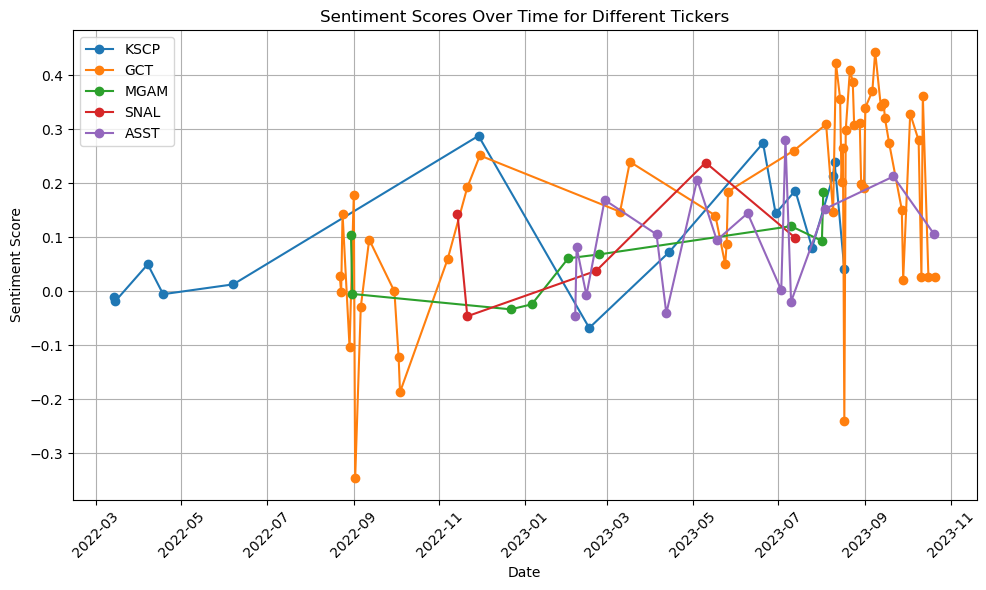

In [12]:
tickers = sentimentfinal['Ticker'].unique()

plt.figure(figsize=(10, 6))

# Iterate through each unique ticker and plot sentiment scores
for ticker in tickers:
    ticker_dataset = sentimentfinal[sentimentfinal['Ticker'] == ticker]
    plt.plot(ticker_dataset['date'], ticker_dataset['sentiment_score'], marker='o', label=ticker)

plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores Over Time for Different Tickers')
plt.xticks(rotation=45)
plt.legend() 
plt.grid()  
plt.tight_layout()